In [1]:
import numpy as np
import pandas as pd

from src.M4_data import prepare_M4_data
from src.M4_experiment import plot_model_prediction, evaluate_model_prediction
from src.ESRNN import ESRNN

In [2]:
X_train_df, y_train_df, X_test_df, y_test_df = prepare_M4_data('Quarterly', num_obs=3) #, num_obs=5
y_train_df

,unique_id,ds,y
0,Q1,1970-01-02,7407.412314
1,Q1,1970-01-03,7528.566074
2,Q1,1970-01-04,7374.709225
3,Q1,1970-01-05,7395.514848
4,Q1,1970-01-06,7654.007989
...,...,...,...
70,Q3,1970-01-22,7212.253565
71,Q3,1970-01-23,7246.218675
72,Q3,1970-01-24,7178.380550
73,Q3,1970-01-25,7182.867128


In [3]:
import torch

## Weekly
# esrnn = ESRNN(max_epochs=4, batch_size=4, dilations=[[1, 4], [52]], rnn_weight_decay=0.5, freq_of_test=1)

## Quarterly
# esrnn = ESRNN(max_epochs=1, batch_size=3, rnn_weight_decay=0.5, freq_of_test=1)

## Daily
# esrnn = ESRNN(max_epochs=2, batch_size=16, learning_rate=3e-4, per_series_lr_multip=1.5,
#               gradient_eps=1e-6, level_variability_penalty=100,
#               dilations=[[1,7],[28]], add_nl_layer=True,
#               seasonality=[7], input_size=7, output_size=14)

## Debugging Quarterly
# with torch.autograd.detect_anomaly():
#     esrnn = ESRNN(max_epochs=4, max_periods=1, batch_size=3, state_hsize=4,
#                   seasonality=[1], input_size=3, output_size=8, dilations=[[1, 2]],
#                   rnn_weight_decay=1.0, freq_of_test=1, random_seed=1, cell_type='LSTM')
#     esrnn.fit(X_train_df, y_train_df, X_test_df, y_test_df)
    
## Debugging Yearly
with torch.autograd.detect_anomaly():
    esrnn = ESRNN(max_epochs=4, max_periods=1, batch_size=3, state_hsize=4,
                  seasonality=[], input_size=3, output_size=8, dilations=[[1, 2]],
                  rnn_weight_decay=1.0, freq_of_test=1, random_seed=1, cell_type='LSTM')
    esrnn.fit(X_train_df, y_train_df, X_test_df, y_test_df)

=============== Training ESRNN  ===============

========= Epoch 0 finished =========
Training time: 0.17289
Training loss: 0.27538999915122986
OWA: 23.502 
SMAPE: 42.866 
MASE: 22.354 
========= Epoch 1 finished =========
Training time: 0.13211
Training loss: 0.2745000123977661
OWA: 23.409 
SMAPE: 42.704 
MASE: 22.262 
========= Epoch 2 finished =========
Training time: 0.13113
Training loss: 0.2736299932003021
OWA: 23.316 
SMAPE: 42.543 
MASE: 22.17 
========= Epoch 3 finished =========
Training time: 0.13084
Training loss: 0.27274999022483826
OWA: 23.223 
SMAPE: 42.381 
MASE: 22.078 
Train finished! 



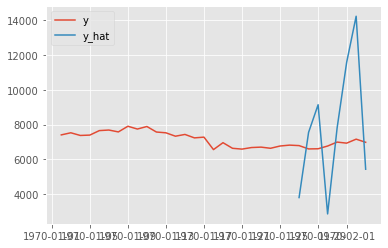

In [4]:
plot_model_prediction(y_train_df, X_test_df, y_test_df, model=esrnn, u_id='Q1')

In [ ]:
esrnn.evaluate_model_prediction(y_train_df, X_test_df, y_test_df)

In [ ]:
# M4 eval
#(0.778*(23.0/100) + 0.847*(24.0/100) + 0.836*(48.0/100) + 0.920*(5.0/100))
#(13.176*() + 9.679*() + 12.126*())
#(14.42*(23.0/(23+24+48)) + 10.09*(24.0/(23+24+48)) + 10.81*(48.0/(23+24+48)))

In [ ]:
from src.hyperpar_tunning_m4 import parse_grid_search
from src.utils_visualization import plot_grid_cat_distributions

gs_df = parse_grid_search('Quarterly')
# plot_cat_distributions(df=gs_df, cat='learning_rate', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='add_nl_layer', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='rnn_weight_decay', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='per_series_lr_multip', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='batch_size', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='training_percentile', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='dilations', var='min_owa')

gs_df['early_stopping'] = gs_df.min_epoch < gs_df.max_epochs
plot_grid_cat_distributions(gs_df, var = 'min_owa',
                            cats=['learning_rate', 'per_series_lr_multip', 'batch_size', 'early_stopping',
                                  'rnn_weight_decay', 'training_percentile', 'add_nl_layer', 'dilations'])
# plot_grid_cat_distributions(gs_df, var = 'owa',
#                             cats=['learning_rate', 'per_series_lr_multip', 'batch_size', 'early_stopping',
#                                   'rnn_weight_decay', 'training_percentile', 'add_nl_layer', 'dilations'])

In [ ]:
gs_df = parse_grid_search('Monthly')
gs_df.min_owa.max()

In [ ]:
gs_df = parse_grid_search('Quarterly')
gs_df.min_owa.max()